In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv('Data/GroceryDataset.csv')
df.head()

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df.tail()

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
1752,Snacks,$23.99,No Discount,NaN,"Oberto Thin Style Smoked Sausage Stick, Cockta...",$,Cocktail Pepperoni Smoked Sausage Sticks 3...,Cocktail PepperoniSmoked Sausage Sticks3 oz ba...
1753,Snacks,$49.99,No Discount,NaN,"Cheetos Crunchy, Original, 2.1 oz, 64-count",$,Made with Real Cheese,64-count2.1 oz Bags
1754,Snacks,$22.99,No Discount,NaN,"Sabritas Chile & Limon Mix, Variety Pack, 30-c...",$,Chile & Limón Mix Variety Pack 30 ct Net...,8-Doritos Dinamita Chile Limón Flavored Rolled...
1755,Snacks,$17.49,No Discount,NaN,"Fruit Roll-Ups, Variety Pack, 72-count",$,Variety Pack 1 Box with 72 Rolls Flavore...,Fruit Flavored Snacks\nVariety Includes: Straw...
1756,Snacks,$21.99,No Discount,NaN,"Takis, Rolled Tortilla Chips, Intense Nacho, 1...",$,"Intense Nacho Cheese Non-Spicy 1 oz bag, 5...",Takis Non-Spicy Cheese Tortilla Chips\nIndivid...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sub Category         1757 non-null   object
 1   Price                1754 non-null   object
 2   Discount             1757 non-null   object
 3   Rating               682 non-null    object
 4   Title                1757 non-null   object
 5   Currency             1752 non-null   object
 6   Feature              1739 non-null   object
 7   Product Description  1715 non-null   object
dtypes: object(8)
memory usage: 109.9+ KB


In [6]:
np_category_array = np.array(df['Sub Category'])
np_category_array

array(['Bakery & Desserts', 'Bakery & Desserts', 'Bakery & Desserts', ...,
       'Snacks', 'Snacks', 'Snacks'], dtype=object)

In [7]:
unique_category,counts = np.unique(np_category_array,return_counts=True)
print(unique_category)
print(counts)

['Bakery & Desserts' 'Beverages & Water' 'Breakfast' 'Candy'
 'Cleaning Supplies' 'Coffee' 'Deli' 'Floral' 'Gift Baskets' 'Household'
 'Kirkland Signature Grocery' 'Laundry Detergent & Supplies'
 'Meat & Seafood' 'Organic' 'Pantry & Dry Goods'
 'Paper & Plastic Products' 'Poultry' 'Seafood' 'Snacks']
[ 33 148  21 154  94  95  21  75  89  81 122  39 144  33 171  88   9  47
 293]


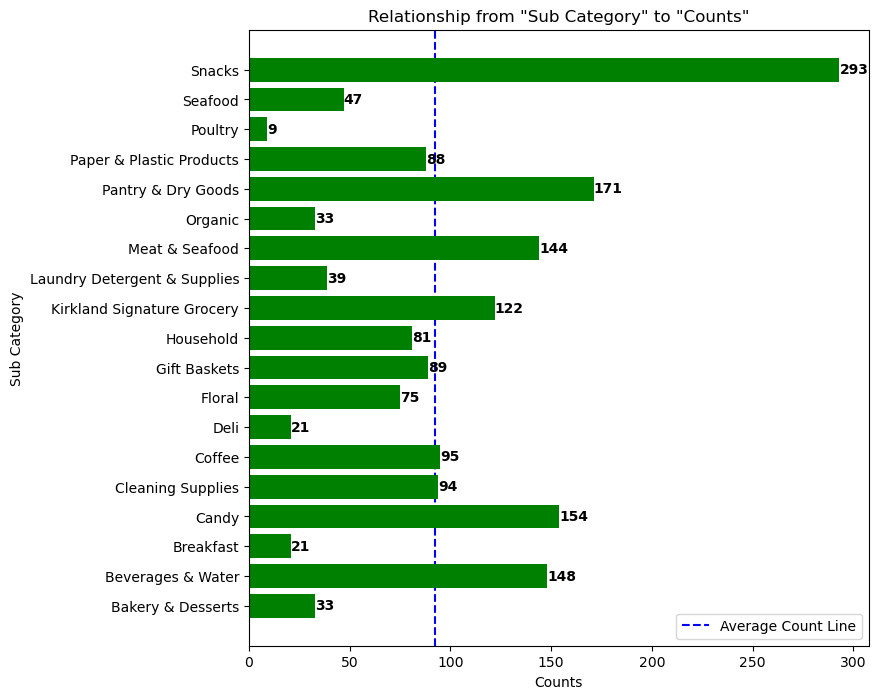

In [8]:
fig, ax = plt.subplots(figsize=(8,8))

bar_chart = plt.barh(unique_category, counts, color ='green')
ax.bar_label(bar_chart, color='black',
             fontsize=10, label_type='edge',
            fontweight='bold')

ax.axvline(x=np.mean(counts), zorder=0, color='blue', ls='--', lw=1.5,label='Average Count Line')
ax.legend()

plt.xlabel('Counts')
plt.ylabel('Sub Category')
plt.title('Relationship from "Sub Category" to "Counts"')
plt.show()

In [9]:
df = df.dropna(subset=['Price'])

In [10]:
def extract_prices(input_string):
    price_pattern = r'\$([0-9.]+)through\-\$([0-9.]+)'
    match = re.search(price_pattern, input_string)
    if match:
        price1 = float(match.group(1))
        price2 = float(match.group(2))
        return round((price1 + price2)/2.0, 2)

    price_pattern = r'\$([0-9.]+)'
    match = re.search(price_pattern, input_string)
    if match:
        return round(float(match.group(1)), 2)
    return 0.0

In [11]:
df[['average_price']] = df['Price'].apply(lambda x: pd.Series(extract_prices(x)))

In [12]:
df.head()

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description,average_price
0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...,56.99
1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord...",159.99
2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...,44.99
3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...,39.99
4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...,59.99


In [13]:
df_sub_catergory_group = round(df.groupby('Sub Category')['average_price'].mean())

In [14]:
df_sub_catergory_group

Sub Category
Bakery & Desserts                83.0
Beverages & Water                37.0
Breakfast                        13.0
Candy                            25.0
Cleaning Supplies                31.0
Coffee                           33.0
Deli                            209.0
Floral                           80.0
Gift Baskets                     81.0
Household                        28.0
Kirkland Signature Grocery       28.0
Laundry Detergent & Supplies     34.0
Meat & Seafood                  224.0
Organic                          22.0
Pantry & Dry Goods               29.0
Paper & Plastic Products         25.0
Poultry                         160.0
Seafood                         196.0
Snacks                           22.0
Name: average_price, dtype: float64

In [15]:
df_sub_catergory_group_price = df_sub_catergory_group.map(lambda x: '$' + "{:.2f}".format(x))

In [16]:
df_sub_catergory_group_price

Sub Category
Bakery & Desserts                $83.00
Beverages & Water                $37.00
Breakfast                        $13.00
Candy                            $25.00
Cleaning Supplies                $31.00
Coffee                           $33.00
Deli                            $209.00
Floral                           $80.00
Gift Baskets                     $81.00
Household                        $28.00
Kirkland Signature Grocery       $28.00
Laundry Detergent & Supplies     $34.00
Meat & Seafood                  $224.00
Organic                          $22.00
Pantry & Dry Goods               $29.00
Paper & Plastic Products         $25.00
Poultry                         $160.00
Seafood                         $196.00
Snacks                           $22.00
Name: average_price, dtype: object

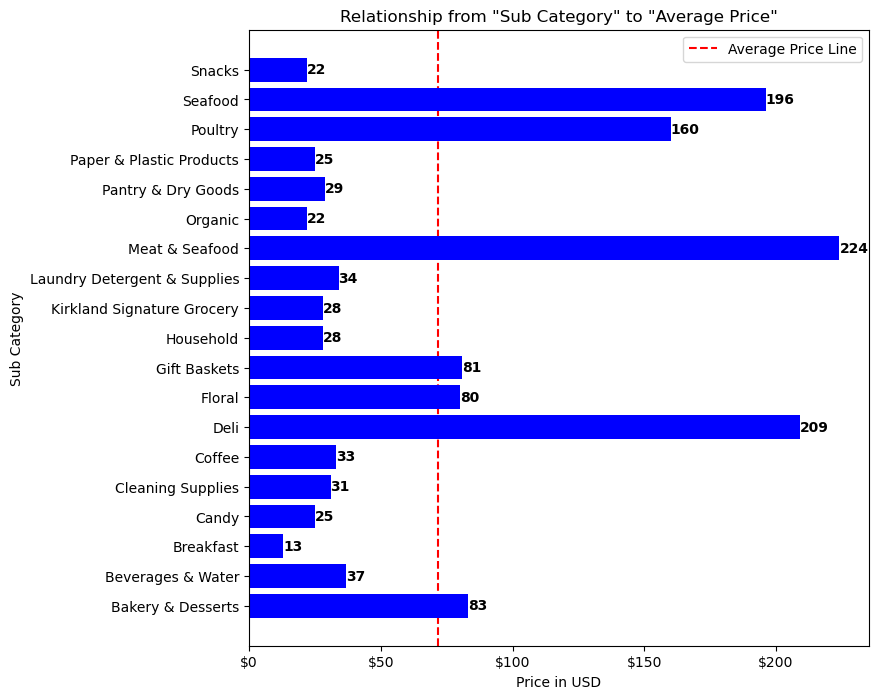

In [17]:
fig, ax = plt.subplots(figsize=(8,8))

bar_chart = plt.barh(unique_category, df_sub_catergory_group, color ='blue')
ax.bar_label(bar_chart, color='black',
             fontsize=10, label_type='edge',
            fontweight='bold')

ax.axvline(x=np.mean(df_sub_catergory_group), zorder=0, color='red', ls='--', lw=1.5,label='Average Price Line')
formatter = ticker.FuncFormatter(lambda x, pos: '$' + '{:.0f}'.format(x))
ax.xaxis.set_major_formatter(formatter)
ax.legend()

plt.xlabel('Price in USD')
plt.ylabel('Sub Category')
plt.title('Relationship from "Sub Category" to "Average Price"')
plt.show()
